# Name: Jay Gemawat
# Major Project - Data Analysis on Mobile Price Classification

##**Aim:** Performing Data Analysis on Mobile Price and Features Dataset and find the best classification model to decide price-range 

###Link:https://colab.research.google.com/drive/1zisM6PMKr_hYPHQMATOgsTrNhDS_amLM?usp=sharing

## Import Calls

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import jax.numpy as jnp  # Import JAX's NumPy

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import clear_output
!wget https://filebin.net/165cryvb2zemke6q/train.csv
!wget https://filebin.net/165cryvb2zemke6q/test.csv
clear_output()

# Step 1 : Exploratory Data Analysis

### i) Reading the dataset - `train.csv`

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape # Getting the shape

(2000, 21)

In [5]:
df.info() # Getting dataFrame related information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### ii) Checking and handling missing values in the dataset

In [6]:
df.isnull().sum() # Checking for null-values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### iii) Understanding the Columns of the dataset

`battery_power`: Total energy a battery can store in one time measured in mAh

`blue`: Has bluetooth or not

`clock_speed`: speed at which microprocessor executes instructions

`dual_sim`: Has dual sim support or not

`fc`: Front Camera mega pixels

`four_g`: Has 4G or not

`int_memory`: Internal Memory in Gigabytes

`m_dep`: Mobile Depth in cm

`mobile_wt`: Weight of mobile phone

`n_cores`: Number of cores of processor

`pc`: Primary Camera mega pixels

`px_height`: Pixel Resolution Height

`px_width`: Pixel Resolution Width

`ram`: Random Access Memory in Mega Bytes

`sc_h`: Screen Height of mobile in cm

`sc_w`: Screen Width of mobile in cm

`talk_time`: longest time that a single battery charge will last when you are

`three_g`: Has 3G or not

`touch_screen`: Has touch screen or not

`wifi`: Has wifi or not

`price_range`: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [7]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen',
                   'wifi','price_range']
discrete_col = ['battery_power', 'ram', 'sc_h', 'sc_w', 'fc', 'pc', 
                'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'talk_time']
continuous_col = ['clock_speed', 'm_dep']

### iv) Describing the modalities of the dataset using `df.describe()`

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### v) Calculation and plot of Correlation between all features present in dataset

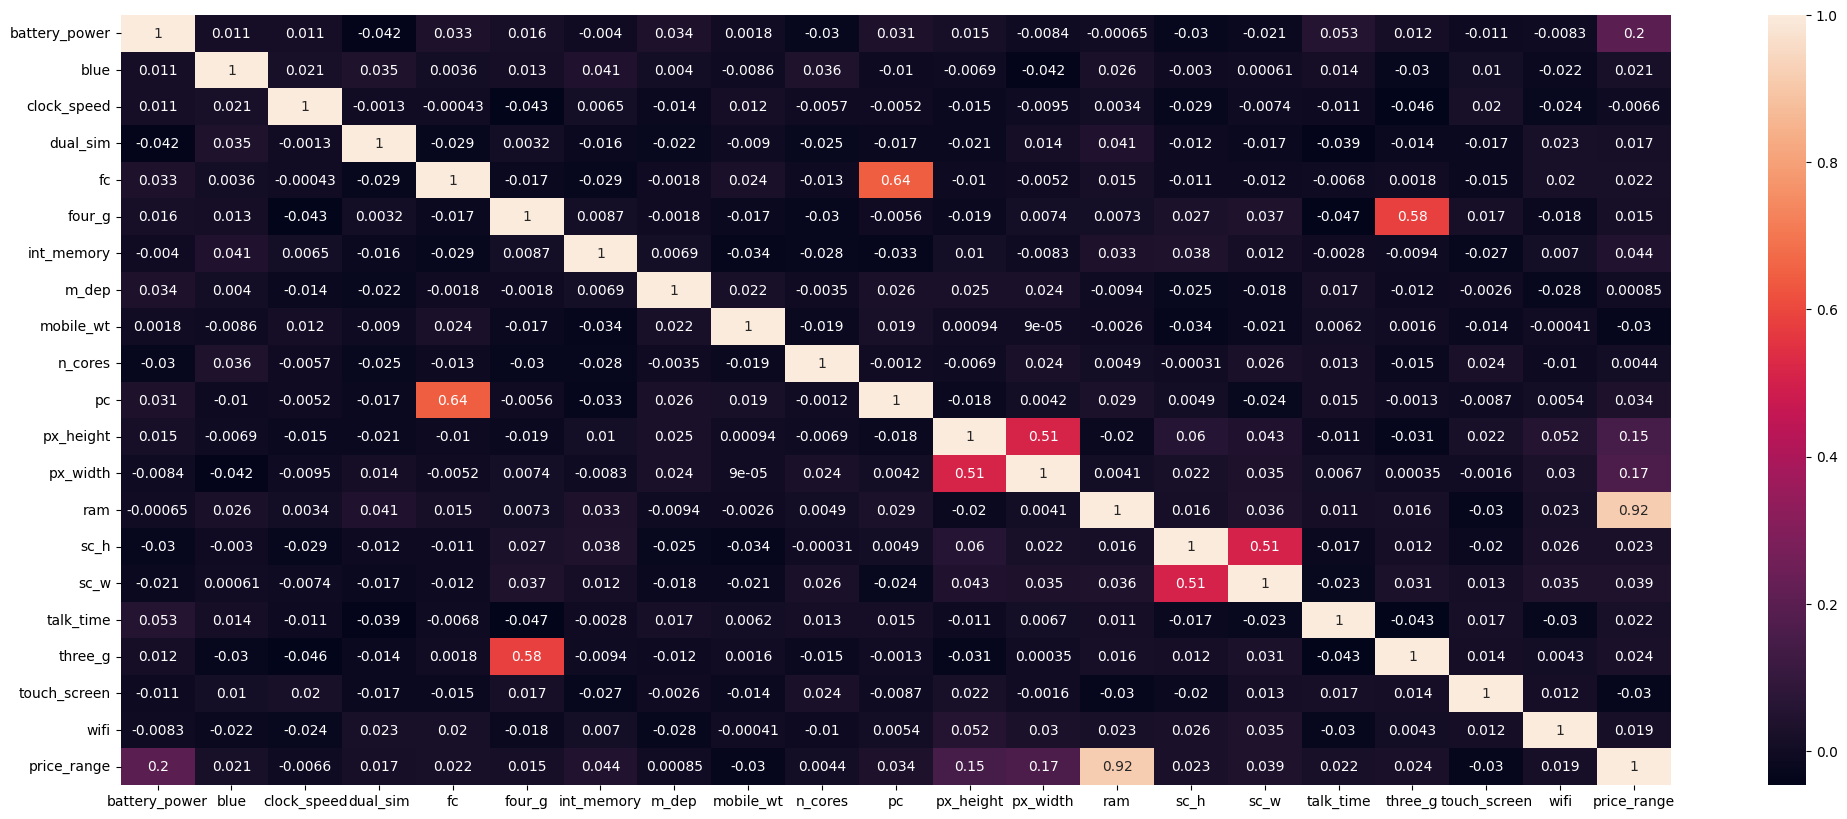

In [9]:
plt.figure(figsize = (25,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

#### **Inference**

As seen, our dependent variable/target `price_range`, has high positive correlation with `ram`.

I do observe the following positive correlations too:

1. `three_g` and `four_g`
2. `pc`(Primary Camera mega pixels) and `fc`(Front Camera mega pixels)
3. `px_weight`(Pixel Resolution Width) and `px_height`(Pixel Resolution Height)
4. `sc_w`(Screen Width of mobile in cm) and `sc_h`(Screen Height of mobile in cm)



In [10]:
#Compare the correlations of our independent variable with other dependent variables
correlation.sort_values(by=["battery_power"],ascending=False).iloc[0].sort_values(ascending=False)

battery_power    1.000000
price_range      0.200723
talk_time        0.052510
m_dep            0.034085
fc               0.033334
pc               0.031441
four_g           0.015665
px_height        0.014901
three_g          0.011522
clock_speed      0.011482
blue             0.011252
mobile_wt        0.001844
ram             -0.000653
int_memory      -0.004004
wifi            -0.008343
px_width        -0.008402
touch_screen    -0.010516
sc_w            -0.021421
n_cores         -0.029727
sc_h            -0.029959
dual_sim        -0.041847
Name: battery_power, dtype: float64

### vi) Exploratory Data Analysis

#### Plot between `ram` and `price_range` - Scatter Plot

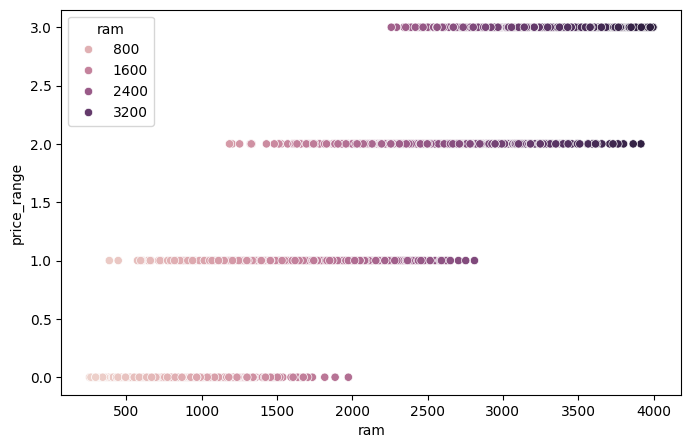

In [11]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=df, x='ram', y='price_range', hue='ram')
plt.show()

#### **Inference**

We can see that there is a limit to the best available level of RAM for each price-level, with the lower price-range being restricted to a maximum of 2GB of RAM while the highest ranges going far above, as should be the case.

#### Plot between `price_range` and `ram` - Point plot

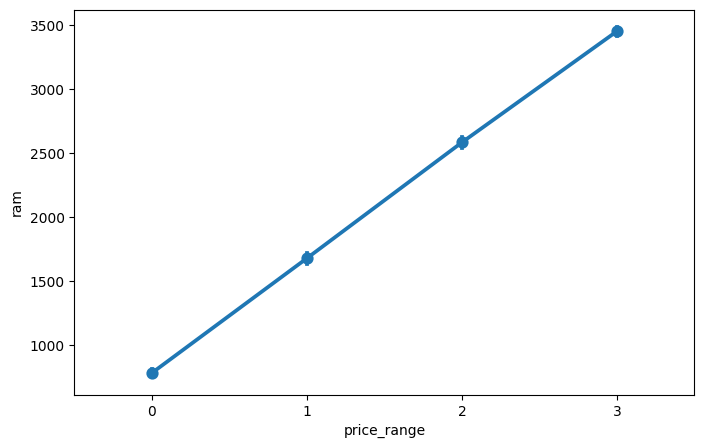

In [12]:
plt.figure(figsize = (8,5))
sns.pointplot(data=df,y='ram',x='price_range')
plt.show()

#### **Inference**

On creating a point-plot for the same features, we can see a straight line, signifying that I can expect a positive correlation

#### Plot between `price_range` and `ram` - Swarm Plot (Hue : `price_range`)

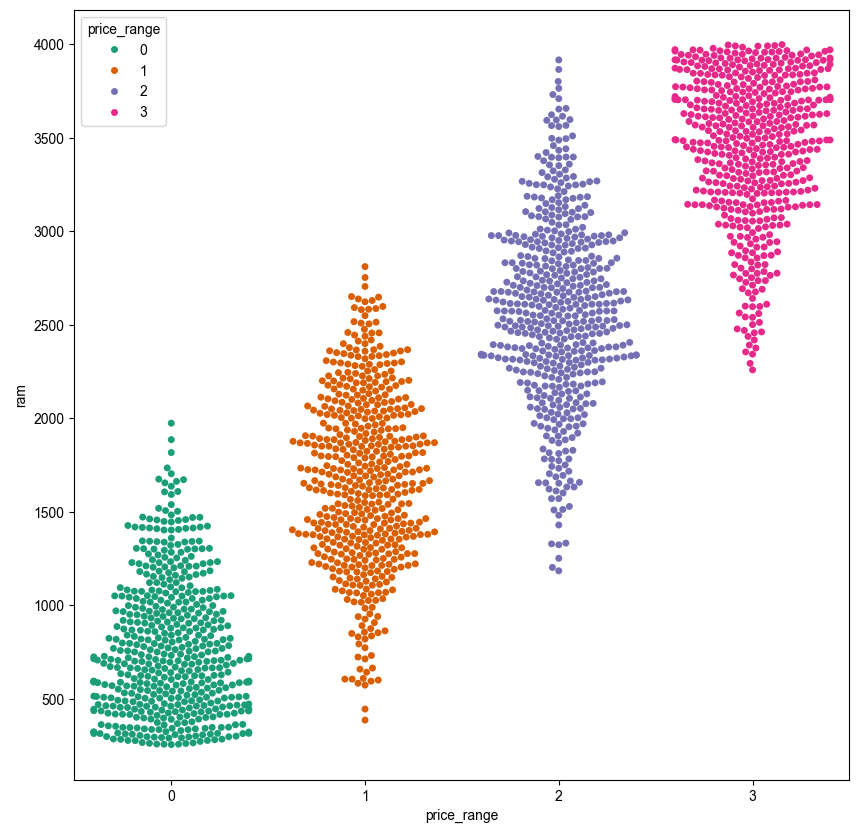

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="price_range", y="ram", hue="price_range",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### **Inference**

We can see that for the price_range values 0 and 3, the swarm is skewed upwards and downwards respectively, showing that we get more options for lower RAM in the lowest-price-range segment while we get more options for higher RAM in the highest-price-range segment

#### Plot between `price_range` and `ram` - Swarm Plot (Hue : `n_cores`)

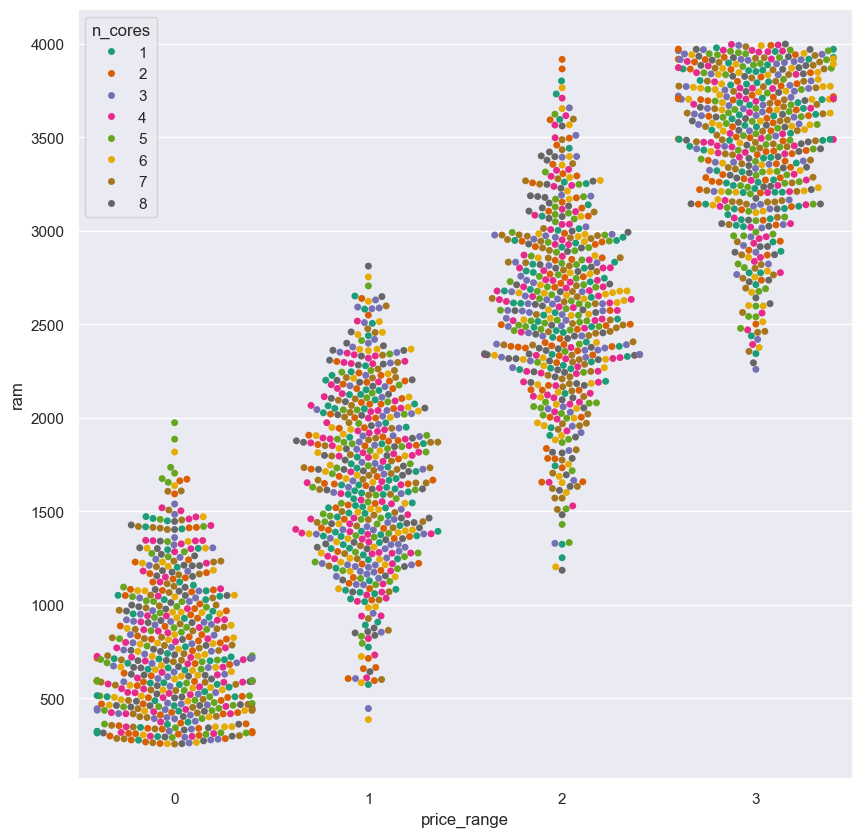

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="price_range", y="ram", hue="n_cores",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### **Inference**

Using the new choice for Hue (`n_cores`), we can see that the choices vary and that there are high `n_cores` options in the `price_range` segment 0 as well as a mix of different values within all segments of `price_range`, signifying that `n_cores` cannot be used for classifying

#### Plot between `price_range` and `ram` - Swarm Plot (Hue : `blue`)

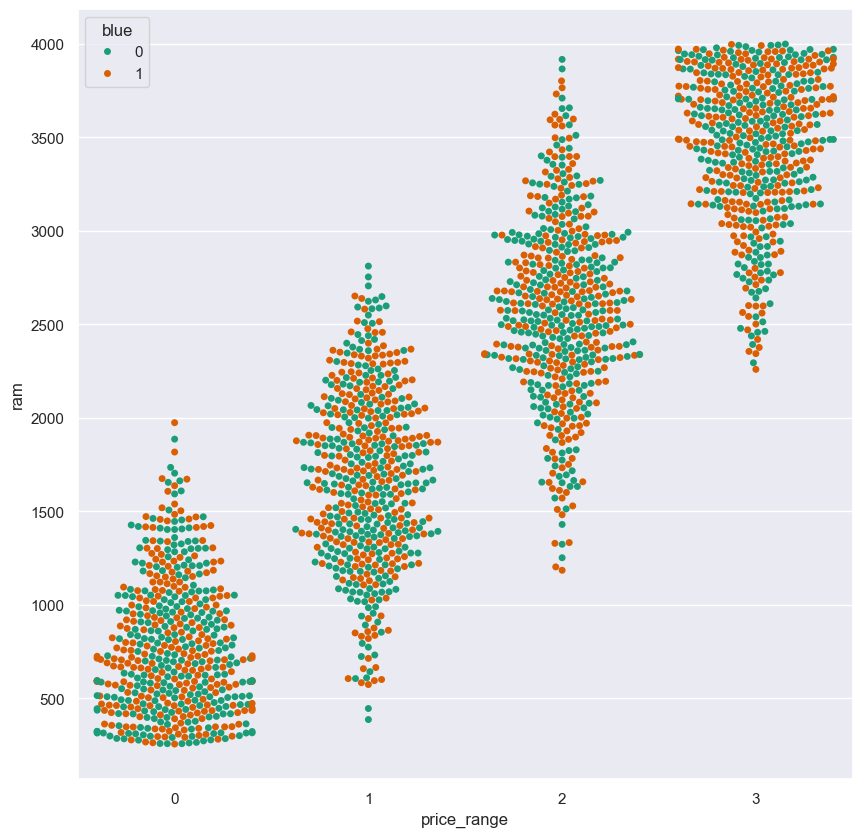

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="price_range", y="ram", hue="blue",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### **Inferences**

We see that the feature of Bluetooth varies significantly even in the higher-priced segments showing that it cannot be used for classifying the data either

#### Plot between `price_range` and `ram` - Swarm Plot (Hue : `dual_sim`)

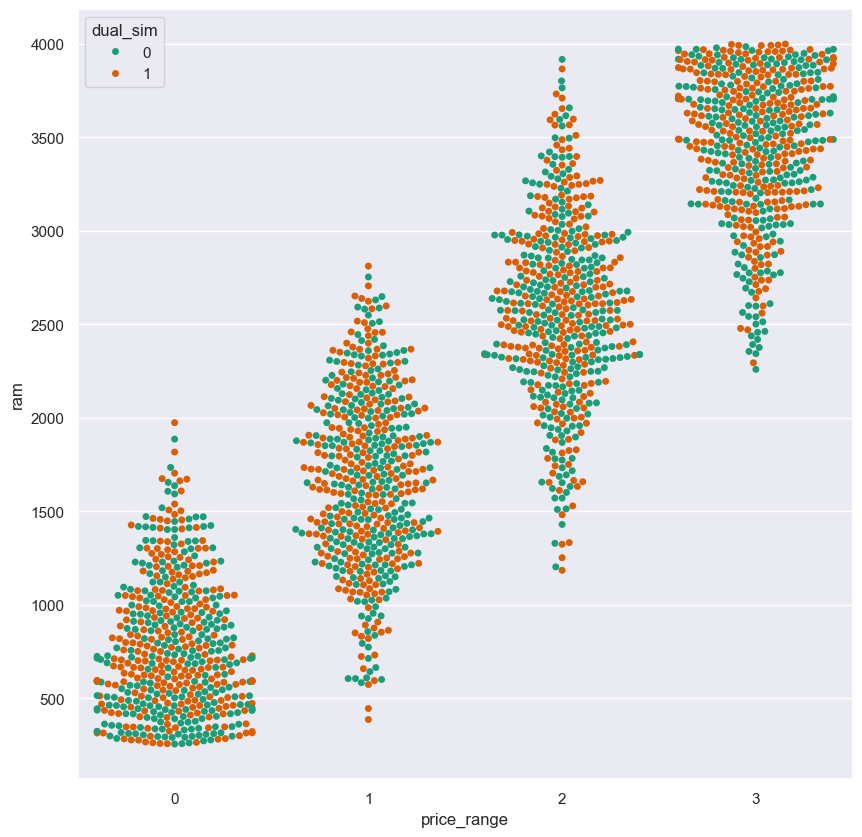

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="price_range", y="ram", hue="dual_sim",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

#### **Inferences**

We see that the feature of Dual-SIM varies significantly even in the higher-priced segments showing that it cannot be used for classifying the data either

#### Plot between `ram` and `price_range` - Box Plot

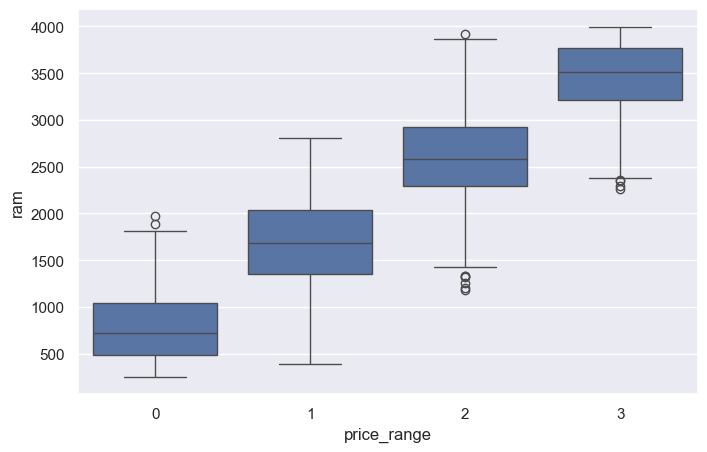

In [17]:
# RAM increases with Price
plt.figure(figsize = (8,5))
sns.boxplot(x='price_range',y='ram',data=df)
plt.show()

#### **Inference**

We can see that the best RAM we can find in `price_range` 2-segment is almost equivalent to the best RAM we can find in `price_range` 3-segment as well, which is a limitation when it comes to `price_range` 0 and 1 with respect to 1 and 2 segments.

#### Plot between `price_range` and `battery_power` - Box Plot

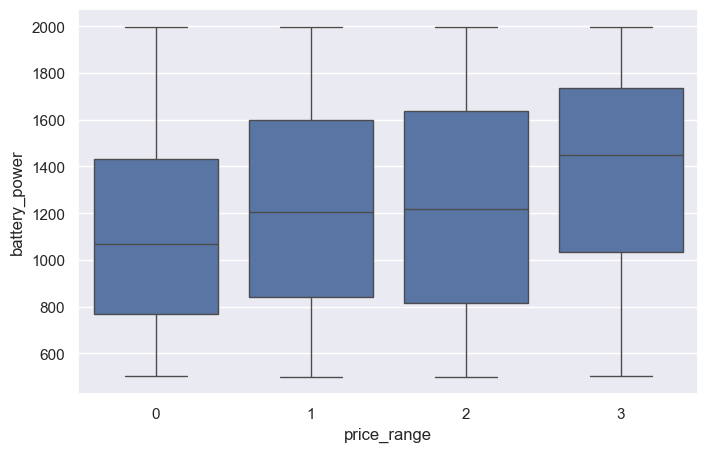

In [18]:
# battery power increases with price
plt.figure(figsize = (8,5))
sns.boxplot(x='price_range',y='battery_power',data=df)
plt.show()

#### **Inference**

We can see that for all the `price_ranges` segments, the maximum available Battery capacity is equivalent across the entire range of data collected, meaning that the maximum and minimum Battery capacities do not depend on price_range, but they may change or act different in terms of the distribution in each price_range.
We also see that `price_range` segments 1 and 2 have a similar distribution, signifying that a person does not gain significantly in this feature on buying a more expensive mobile phone.

#### Plot between `price_range` and `int_memory` - Violin Plot

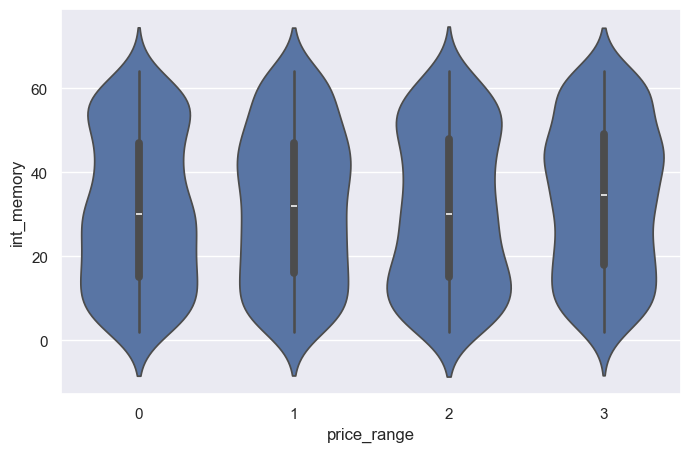

In [19]:
plt.figure(figsize = (8,5))
sns.violinplot(x='price_range',y='int_memory',data=df)
plt.show()

#### **Inferences**

We can see through the violin plot that for all the segments in `price_range`, we have similar options. `price_range` segment-3 has a broad-ness towards the top signifying more number of options with higher `int_memory` in that segment

#### Pie-chart to see population of 3G supported and non-supported phones

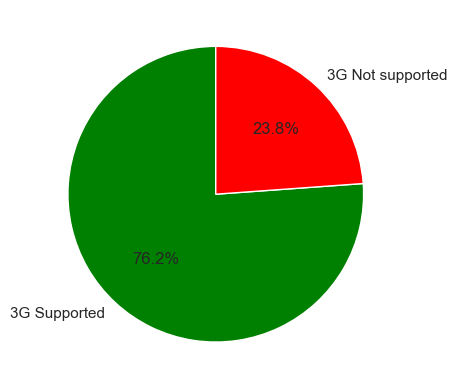

In [20]:
labels = ['3G Supported','3G Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['green', 'red']
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90,colors=colors)
plt.show()

#### Pie-chart to see population of 4G supported and non-supported phones

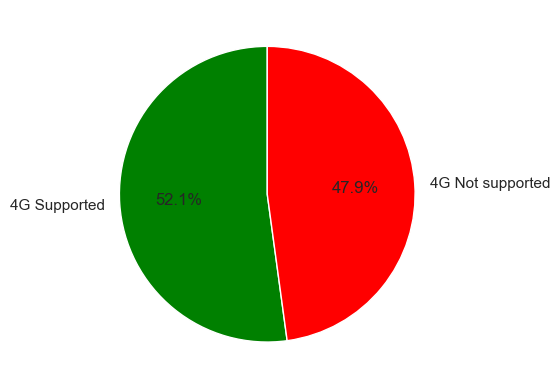

In [21]:
labels = ['4G Supported','4G Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['green', 'red']
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
plt.show()

#### Plot of `price_range` - Andrews Curve

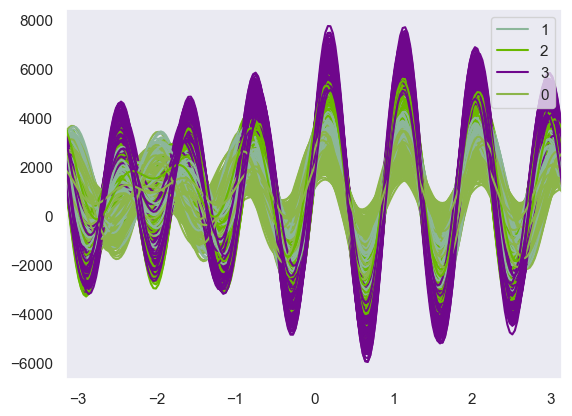

In [22]:
pd.plotting.andrews_curves(df, class_column='price_range')
plt.show()

#### **Inferences**

We can see that the plot of the Andrews Curve for `price_range` is extremely mixed and does not show a clear demarcation between the types for the initial sections

#### Plot of `four_g` - Andrews Curve

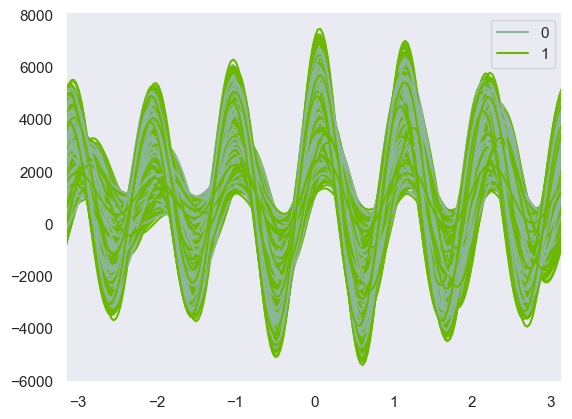

In [23]:
pd.plotting.andrews_curves(df, class_column='four_g')
plt.show()

#### **Inferences**

We can see that the plot of the Andrews Curve for `four_g` is extremely mixed and does not show a clear demarcation between the types, signifying that it is difficult to find a clear classification of the dataset on the basis of this feature.

### Final Inferences from EDA

- Most features except for RAM, Internal Memory and a few others are not useful to perform regression analysis the dataset. On further observation we find that the metrics like `price_range` could be best predicted using a classifier algorithm.
- For most standard features, we see that the maxima for all `price_range` segments falls at the same level, signifying that the user does not gain much from buying a higher-price-segment mobile phone for those specific features
- Plotting of the Andrews curves signify(in initial sections) less demarcation in terms of classification of the dataset on the basis of `price_range`, but on the positive side, in the next section of the graph we notice, it can be classified using the other features. 
- Here we take the decision here than we will perform classification of the dataset on the basis of `price range`.

# Step 2 : Data Cleaning

### i) Checking Standard Deviation to check which features require scaling

- If the variation is Gaussian in nature, we can use Standard-scaling to bring it to a mean of 0 and variance of 1 to help our algorithms perform calculations faster and avoid numerical overflow
- A similar reason would be used for MinMaxScaling, to avoid numerical overflow and large calculations

In [24]:
df.std() # Standard deviation

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         1.118314
dtype: float64

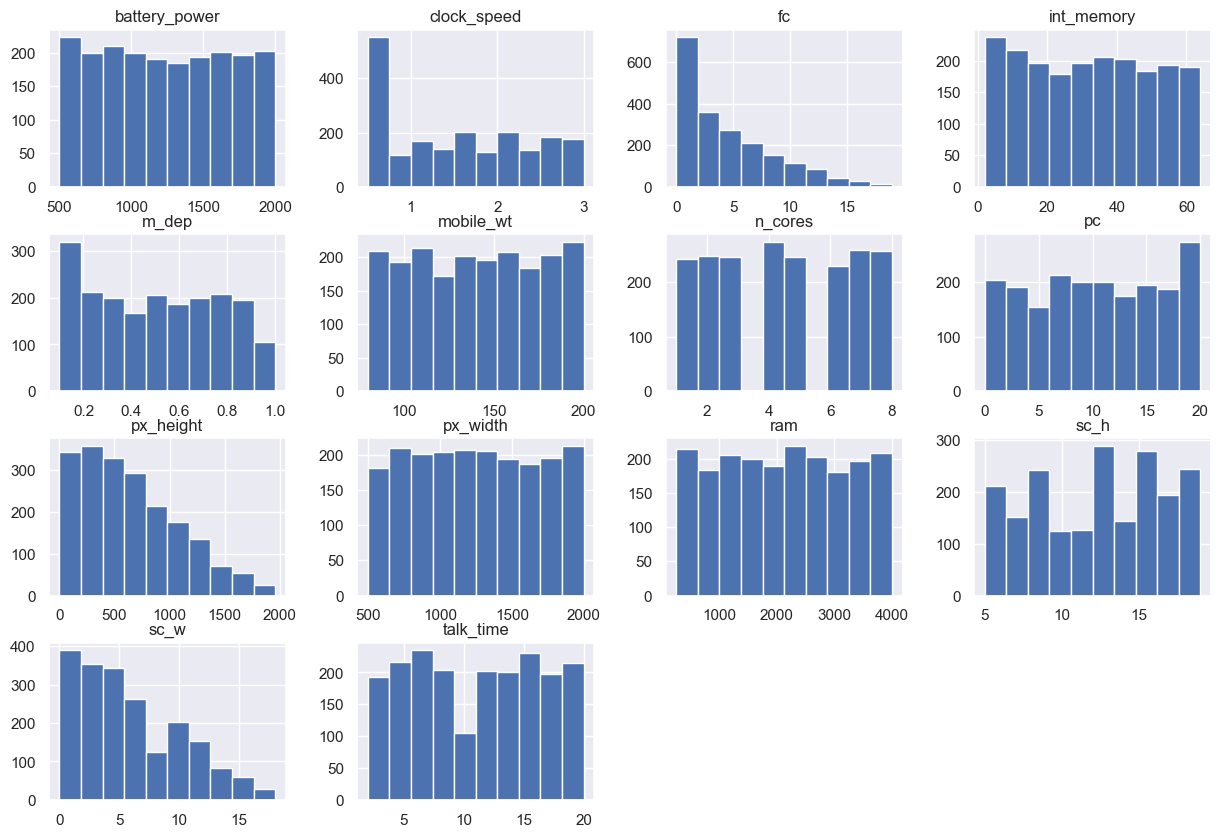

In [25]:
sns.set(rc = {'figure.figsize':(15,10)})
df.drop(df[categorical_col],axis=1).hist()
plt.show()

#### **Inference**

We can see that the distribution of the features does not follow a Gaussian Distribution, so Standard-scaling will not help us.  
We can use MinMaxScaling to help break-down the data and normalize the features.

### ii) Performing MinMaxScaling on Discrete and Continuous 

In [26]:
sns.set(rc = {'figure.figsize':(10,6)})

In [27]:
def simpleMeanImputer(to_imp):
    # Convert the Series to a NumPy array, ignoring NaNs
    data = to_imp[to_imp.notnull()].to_numpy()  # Use notnull() for clarity
    # Compute the mean of the available data
    data_mean = jnp.float64(jnp.mean(data))

    # Apply the mean to fill NaN values
    change = lambda x: data_mean if jnp.isnan(x) else x
    to_imp = to_imp.apply(change)

    return to_imp

In [28]:
scaled_df = df.copy()
def minMaxScaler(feature):
    feature = feature.to_numpy() 
    Xmin = feature.min()
    Xmax = feature.max()
    feature = (feature-Xmin)/(Xmax-Xmin)
    return feature
for i in scaled_df.columns:
    if i in discrete_col or continuous_col:
        scaled_df[i] = minMaxScaler(scaled_df[i])
scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333


In [29]:
X = df.drop(['price_range'], axis=1)
Y = df['price_range']
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


### iii) Train test split on the train data

**Dataset break-down**:  
1.) `train.csv` - 1600 (Training), 400 (Testing)  
2.) `test.csv` - 1000 (Validation)

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2, random_state = 1, shuffle=False)
ytest.reset_index(drop=True, inplace=True)
xtest.reset_index(drop=True, inplace=True)

#### iv) Understanding split-data - `head()` and `shape`

In [31]:
print(f'X-train shape : {xtrain.shape}')
print(f'y-train shape : {ytrain.shape}')
xtrain.head()

X-train shape : (1600, 20)
y-train shape : (1600,)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [32]:
print(f'X-test shape : {xtest.shape}')
print(f'y-test shape : {ytest.shape}')
xtest.head()

X-test shape : (400, 20)
y-test shape : (400,)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1776,1,2.1,1,10,0,35,0.1,172,4,16,278,623,1813,16,13,20,1,1,1
1,1254,1,1.2,0,2,1,27,0.2,134,2,10,1288,1372,817,14,1,16,1,1,1
2,1494,0,1.6,1,4,1,24,0.2,101,1,17,979,1190,3614,15,12,9,1,0,0
3,984,1,2.2,1,0,1,39,0.5,119,8,18,56,1931,2013,11,7,16,1,1,0
4,1179,1,0.8,0,1,0,5,0.9,154,5,17,913,1429,543,8,7,18,0,0,1


# Step 3 : Model-definitions and initial testing

## Models chosen : 
#### 1. Linear Regression (OLS) - Using sklearn + scratch implementation
#### 2. Logistic Regression - Using sklearn
#### 3. Naive Bayes - Using sklearn
#### 4. K-nearest Neighbors - Using sklearn + scratch implementation
#### 5. Support Vector Machine Classifier - Using sklearn
#### 6. Decision Tree Classifier - Using sklearn
#### 7. Voting Classifier - Using sklearn
#### 8. AdaBoost Ensemble Classifier - Using sklearn
#### 9. Random Forest Classifier - Using sklearn

### i) Linear Regression

#### Linear Regression function - scratch Implementation + sklearn

In [33]:
def simpleLinearRegression(x, y):

    #Computing mean values
    meanx = np.average(x)
    meany = np.average(y)


    #Computing xy mean, x mean square and x square bar
    meanxy = np.average(np.multiply(x, y))
    xmeansquare = np.square(meanx)
    xsquarebar = np.average(np.square(x))


    #Computing b1 and b0
    b1 = np.subtract(np.multiply(meanx, meany), meanxy)/np.subtract(xmeansquare, xsquarebar)
    b0 = np.subtract(meany, np.multiply(b1, meanx))


    #Computing predicted value of y -> y_predict
    y_predict = np.add(np.multiply(b1, x), b0)


    #Computing SSR - sum of square residuals
    residuals = np.subtract(y_predict , meany)  #Formula
    ssr = np.sum(np.square(residuals))


    #Computing SSE - sum of square residuals
    error = np.subtract(y, y_predict)  #Formula
    sse = np.sum(np.square(error))


    #Computing r square
    r2 = np.true_divide(ssr, np.add(sse, ssr))   #Formula

    plt.scatter(x,y)
    plt.plot(x, y_predict,"r-")
    plt.xlabel("Independent Variable x-->")
    plt.ylabel("Dependent Variable y-->")
    plt.title("Simple Linear Regresssion")
    plt.show()

    return r2, y_predict, (b0, b1)

##### - Using `ram` and `price_range`

In [34]:
assert (xtrain['ram'].shape == ytrain.shape)

In [35]:
#Without In-Built Functions

x = xtrain['ram'].to_numpy()
y = ytrain.to_numpy()

Text(0, 0.5, 'Price Range')

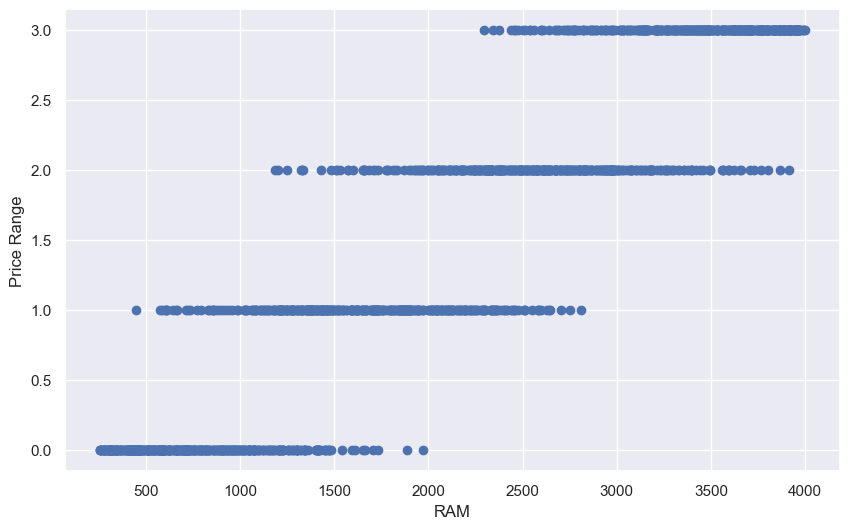

In [36]:
#Plotting scatter plot

plt.scatter(x,y)
plt.xlabel('RAM')
plt.ylabel('Price Range')

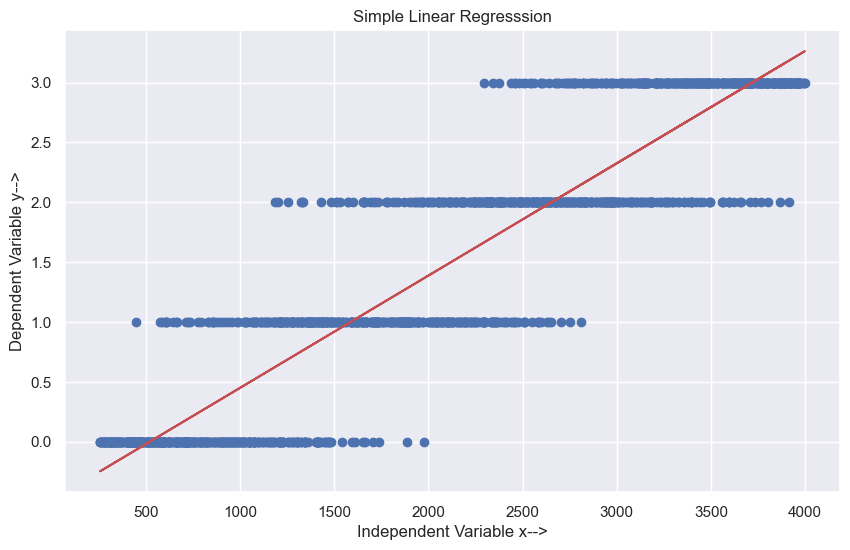

In [37]:
#Regression Line
r2, y_predict, t = simpleLinearRegression(x, y)

In [38]:
#Using sklearn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = x.reshape((-1,1))  

#Fitting the model into data
model.fit(x, y)

#Computing R square value using Linear Regression Model -> model
r_sq = model.score(x,y)

#Computing Intercept and Coefficient
intercept = model.intercept_   #b0
coeff = model.coef_   #b1

In [39]:
#Using OLS
import statsmodels.api as sm

x = sm.add_constant(x)
results = sm.OLS(y ,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     8583.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:46:10   Log-Likelihood:                -964.97
No. Observations:                1600   AIC:                             1934.
Df Residuals:                    1598   BIC:                             1945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4876      0.024    -20.144      0.0

##### Using `pc` and `fc`

In [40]:
#Without In-Built Functions

x = xtrain['pc'].to_numpy()
y = xtrain['fc'].to_numpy()

Text(0, 0.5, 'front camera')

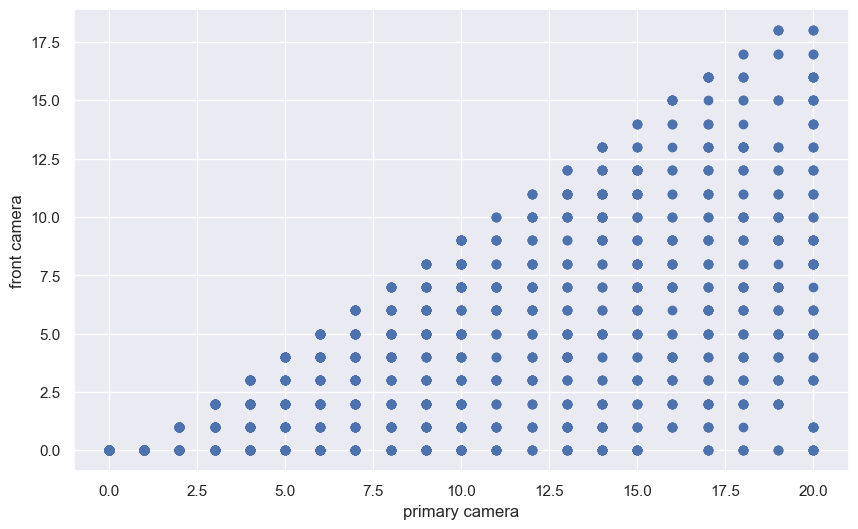

In [41]:
#Plotting scatter plot

plt.scatter(x,y)
plt.xlabel('primary camera')
plt.ylabel('front camera')

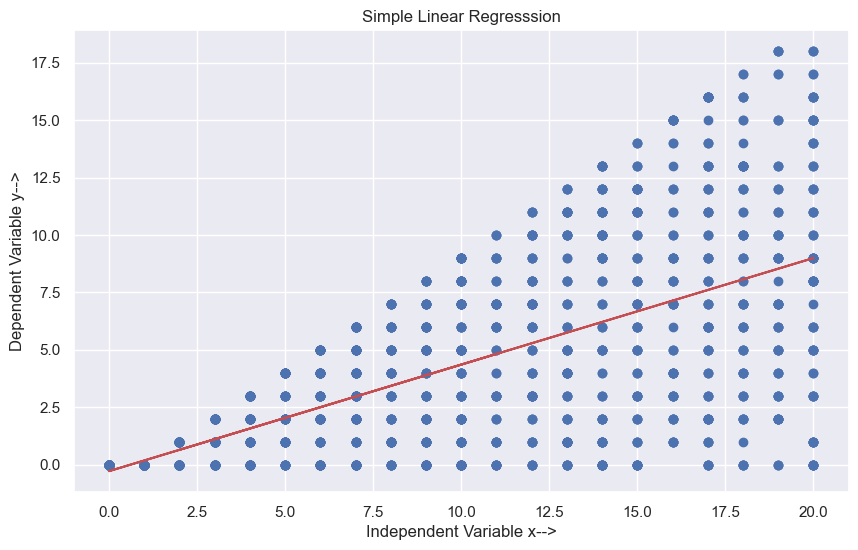

In [42]:
#Regression Line

r2, y_predict, t = simpleLinearRegression(x, y)

In [43]:
#Using sklearn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = x.reshape((-1,1))  

#Fitting the model into data
model.fit(x, y)

#Computing R square value using Linear Regression Model -> model
r_sq = model.score(x,y)

#Computing Intercept and Coefficient
intercept = model.intercept_   #b0
coeff = model.coef_   #b1

In [44]:
#Using OLS
import statsmodels.api as sm

x = sm.add_constant(x)
results = sm.OLS(y ,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.59e-192
Time:                        11:46:10   Log-Likelihood:                -4183.1
No. Observations:                1600   AIC:                             8370.
Df Residuals:                    1598   BIC:                             8381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2855      0.158     -1.812      0.0

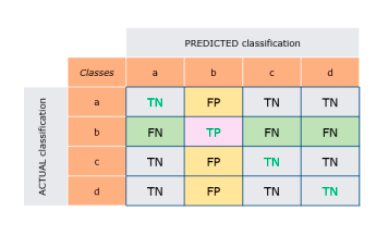

### ii) Logistic Regression

Logistic Regresssion Accuracy Score:  0.61


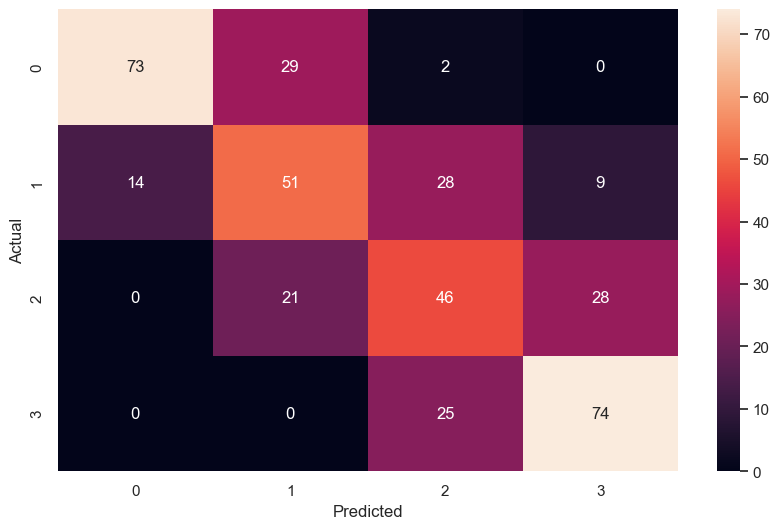

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

l = LogisticRegression(random_state=0)
l.fit(xtrain,ytrain)
ypredlr = l.predict(xtest)
accuracy = metrics.accuracy_score(ytest, ypredlr)
print('Logistic Regresssion Accuracy Score: ', accuracy)

confusion_matrixlr = pd.crosstab(ytest, ypredlr, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrixlr, annot = True)
plt.show()

In [46]:
print(classification_report(ytest, ypredlr))
f1_lr = f1_score(ytest, ypredlr, average='macro')
print(f1_lr)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       104
           1       0.50      0.50      0.50       102
           2       0.46      0.48      0.47        95
           3       0.67      0.75      0.70        99

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.61       400
weighted avg       0.62      0.61      0.61       400

0.6102526549525751


### iii) Naive Bayes

Naive Bayes Accuracy Score:  0.7775


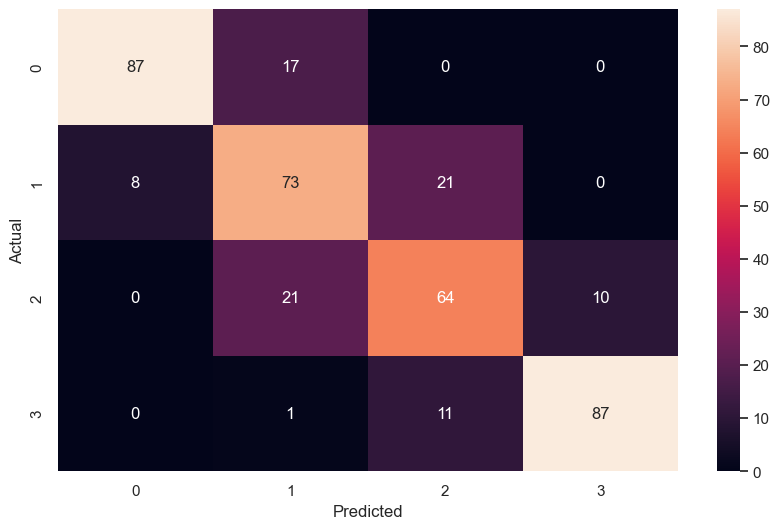

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create the model
nb = GaussianNB()
nb.fit(xtrain, ytrain)
yprednb = nb.predict(xtest)

accuracynb = metrics.accuracy_score(ytest, yprednb)    #Evaluating performance of model
print('Naive Bayes Accuracy Score: ', accuracynb)

#Confusion matrix
#Using Pandas crosstab and seaborn library

confusion_matrixnb = pd.crosstab(ytest, yprednb, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrixnb, annot = True)
plt.show()

In [48]:
print(classification_report(ytest, yprednb))
f1_nb = f1_score(ytest, yprednb, average='macro')
print(f1_nb)

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       104
           1       0.65      0.72      0.68       102
           2       0.67      0.67      0.67        95
           3       0.90      0.88      0.89        99

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

0.7786317550135828


### iv) K-Nearest Neighbors


In [49]:
def euclidean_dist(x1, y1, x2, y2):
    return np.sqrt(np.power((x1-x2), 2) + np.power((y1-y2), 2))

In [50]:
def knn_test_point(x, y, k, base_X, base_Y):
    dist_mat = list()
    for name, i in enumerate(zip(base_X.iloc[:, 0], base_X.iloc[:, 1])):
        dist_mat.append((name, euclidean_dist(x, y, i[0], i[1])))
    dist_mat.sort(key=lambda x:x[1])
    
    res = list()
    for i in range(k):
        res.append(base_Y[dist_mat[i][0]])

    pred = max(set(res), key=res.count)
    return pred

In [51]:
def test(k, base_x, base_y):
    pred_res = list()
    for i,j in zip(base_x.iloc[:, 0], base_x.iloc[:, 1]):
        pred_res.append(knn_test_point(i, j, k, base_x, base_y))  
    return pred_res
res = test(7, xtest, ytest)

In [52]:

accuracyknn = metrics.accuracy_score(ytest, res)
print('KNN (Custom) Accuracy Score: ', accuracyknn)

KNN (Custom) Accuracy Score:  0.44


KNN Accuracy Score:  0.905


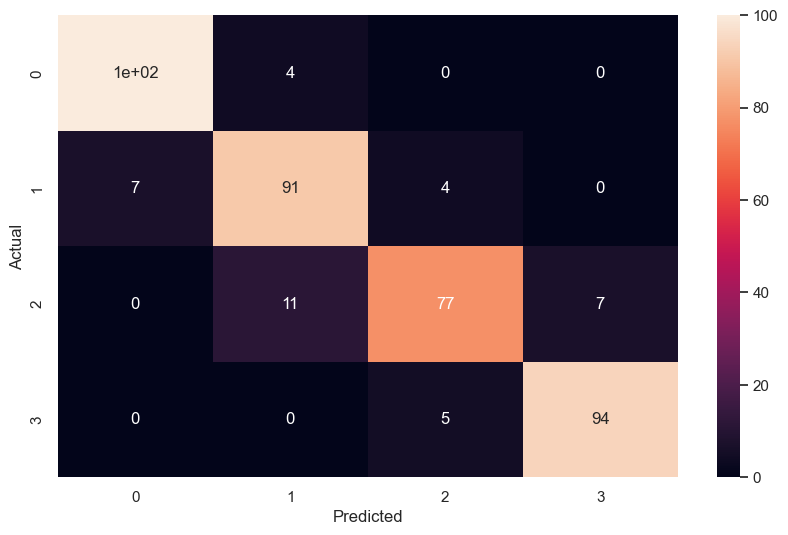

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)
ypredknn = knn.predict(xtest)
accuracyknn = metrics.accuracy_score(ytest, ypredknn)
print('KNN Accuracy Score: ', accuracyknn)

confusion_matrixknn = pd.crosstab(ytest, ypredknn, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrixknn, annot = True)
plt.show()

In [54]:
print(classification_report(ytest, ypredknn))
f1_knn = f1_score(ytest, ypredknn, average='macro')
print(f1_knn)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.86      0.89      0.88       102
           2       0.90      0.81      0.85        95
           3       0.93      0.95      0.94        99

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.91      0.90       400

0.9034240069649918


### v) Support Vector Machine Classifier

SVM Accuracy Score:  0.98


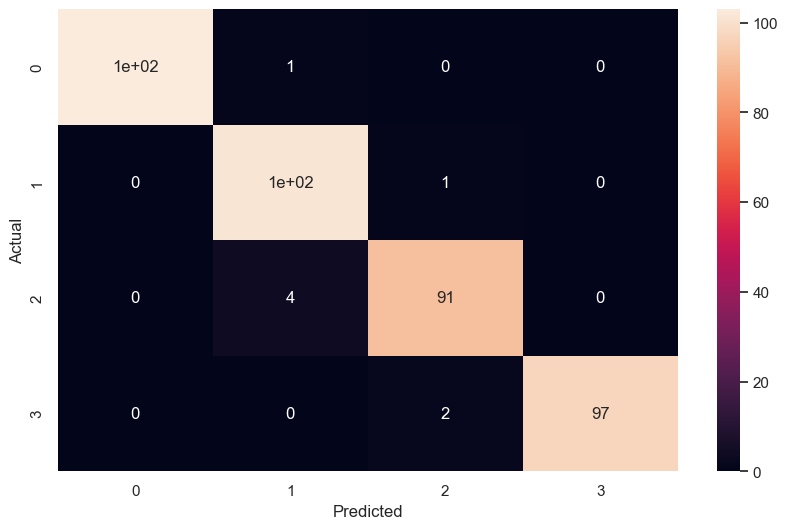

In [55]:
from sklearn.svm import SVC  

svm = SVC(kernel='linear') 
svm.fit(xtrain, ytrain)
ypredsvm = svm.predict(xtest)
accuracysvm = metrics.accuracy_score(ytest, ypredsvm)
print('SVM Accuracy Score: ', accuracysvm)

confusion_matrixsvm = pd.crosstab(ytest, ypredsvm, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrixsvm, annot = True)
plt.show()

In [56]:
print(classification_report(ytest, ypredsvm))
f1_svm = f1_score(ytest, ypredsvm, average='macro')
print(f1_svm)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.95      0.99      0.97       102
           2       0.97      0.96      0.96        95
           3       1.00      0.98      0.99        99

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

0.97977045240244


### vi) Decision Tree Classifier


Decision Tree Accuracy Score:  0.8075


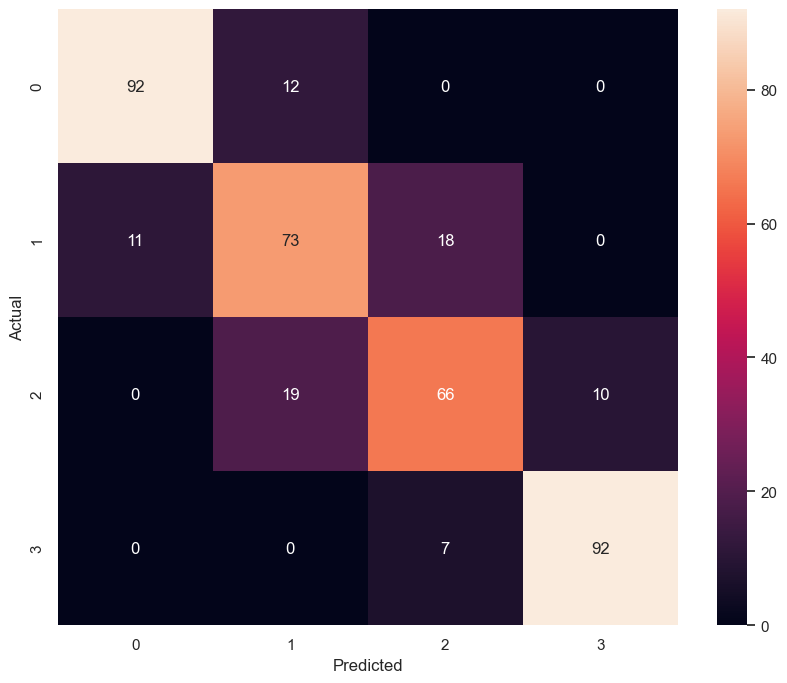

In [57]:
from sklearn.tree import DecisionTreeClassifier
  
dtrees = DecisionTreeClassifier(random_state = 0) 
dtrees.fit(xtrain, ytrain)
ypreddt = dtrees.predict(xtest)
accuracydt = metrics.accuracy_score(ytest, ypreddt)
print('Decision Tree Accuracy Score: ', accuracydt)

plt.rcParams['figure.figsize'] = (10,8)
confusion_matrixdt = pd.crosstab(ytest, ypreddt, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrixdt, annot = True)
plt.show()

In [58]:
print(classification_report(ytest, ypreddt))
f1_dt = f1_score(ytest, ypreddt, average='macro')
print(f1_dt)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       104
           1       0.70      0.72      0.71       102
           2       0.73      0.69      0.71        95
           3       0.90      0.93      0.92        99

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

0.8056817644733842


### vii) Voting Classifier (Logistic Regression and Decision Tree)

In [59]:
from sklearn.ensemble import VotingClassifier


final_model = VotingClassifier(estimators=[('dt', dtrees),('lr', l)], voting='soft')
final_model.fit(xtrain, ytrain)
 
ypredlrdt = final_model.predict(xtest)
ypredlrdt_proba = final_model.predict_proba(xtest)
accuracylrdt = metrics.accuracy_score(ytest, ypredlrdt)
print('Voting Classifier Ensemble Accuracy Score: ', accuracylrdt)

# printing log loss between actual and predicted value
from sklearn.metrics import log_loss

print('Voting Classifier Ensemble Log-Loss: ', log_loss(ytest, ypredlrdt_proba))

Voting Classifier Ensemble Accuracy Score:  0.8075
Voting Classifier Ensemble Log-Loss:  0.5428754080497646


In [60]:
print(classification_report(ytest, ypredlrdt))
f1_lrdt = f1_score(ytest, ypredlrdt, average='macro')
print(f1_lrdt)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       104
           1       0.70      0.72      0.71       102
           2       0.73      0.69      0.71        95
           3       0.90      0.93      0.92        99

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

0.8056817644733842


### viii) AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

adab = AdaBoostClassifier(n_estimators=100, random_state=0)
adab.fit(xtrain, ytrain)

ypredadb = adab.predict(xtest)
ypredadbprob = adab.predict_proba(xtest)
accuracyadb = metrics.accuracy_score(ytest, ypredadb)

print('AdaBoost Ensemble Accuracy Score: ', accuracyadb)

# printing log loss between actual and predicted value
from sklearn.metrics import log_loss

print('AdaBoost Ensemble Log-Loss: ', log_loss(ytest, ypredadbprob))

AdaBoost Ensemble Accuracy Score:  0.6325
AdaBoost Ensemble Log-Loss:  0.8629194822716737


In [62]:
print(classification_report(ytest, ypredadb))
f1_adb = f1_score(ytest, ypredadb, average='macro')
print(f1_adb)

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       104
           1       0.58      0.79      0.67       102
           2       0.49      0.63      0.55        95
           3       0.75      0.45      0.57        99

    accuracy                           0.63       400
   macro avg       0.67      0.63      0.63       400
weighted avg       0.67      0.63      0.63       400

0.6308681837092693


### ix) Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(xtrain, ytrain)

ypredrfc = rfc.predict(xtest)
ypredrfcprob = adab.predict_proba(xtest)
accuracyrfc = metrics.accuracy_score(ytest, ypredadb)

print('Random Forest Ensemble Accuracy Score: ', accuracyrfc)

# printing log loss between actual and predicted value
from sklearn.metrics import log_loss

print('Random Forest Ensemble Log-Loss: ', log_loss(ytest, ypredrfcprob))

Random Forest Ensemble Accuracy Score:  0.6325
Random Forest Ensemble Log-Loss:  0.8629194822716737


In [64]:
print(classification_report(ytest, ypredrfc))
f1_rfc = f1_score(ytest, ypredrfc, average='macro')
print(f1_rfc)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       104
           1       0.77      0.84      0.81       102
           2       0.80      0.78      0.79        95
           3       0.93      0.91      0.92        99

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

0.8573423210541592


### Final results from initial Model run

#### Metric to be used: F1 Score

In [65]:
model_dict = {'Logistic Regression':f1_lr, 'Gaussian Naive-Bayes':f1_nb, 'K-Nearest Neighbors':f1_knn, 'Support-Vector Machines':f1_svm, 'Decision Trees':f1_dt, 'Voting Classifier':f1_lrdt, 'AdaBoost':f1_adb, 'Random Forest Classifier':f1_rfc}
for i,j in model_dict.items():
    print(f'F1-Score for {i} : {j*100}%')


print(f'\n\nFinal Best Classification model [{max(model_dict, key=model_dict.get)}]: {max(model_dict.values())*100}%')

F1-Score for Logistic Regression : 61.02526549525751%
F1-Score for Gaussian Naive-Bayes : 77.86317550135828%
F1-Score for K-Nearest Neighbors : 90.34240069649918%
F1-Score for Support-Vector Machines : 97.977045240244%
F1-Score for Decision Trees : 80.56817644733843%
F1-Score for Voting Classifier : 80.56817644733843%
F1-Score for AdaBoost : 63.086818370926935%
F1-Score for Random Forest Classifier : 85.73423210541591%


Final Best Classification model [Support-Vector Machines]: 97.977045240244%


### Performing Grid-search for K-Nearest Neighbors and SVMC

In [ ]:
from sklearn.model_selection import GridSearchCV
 
svc = SVC()
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1],
              'kernel': ['rbf', 'linear'],
              'class_weight': ['balanced', None]}
 
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3, scoring='f1_macro')

grid.fit(xtrain, ytrain)
yprednsvm = grid.predict(xtest)
accuracynsvm = metrics.accuracy_score(ytest, yprednsvm)
print('SVM Accuracy Score: ', accuracynsvm)

print(classification_report(ytest, yprednsvm))
f1_new_svm = f1_score(ytest, yprednsvm, average='macro')
print(f'F1 Score: {f1_new_svm}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.100 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.100 total time=   0.1s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.100 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.101 total time=   0.1s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.100 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.966 total time=   0.5s
[CV 2/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.972 total time=   0.3s
[CV 3/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.975 total time=   0.6s
[CV 4/5] END C=0.1, class_weight=balanced, gamma=1, kernel=linear;, score=0.963 total time=   0.6s
[CV 5/5] END C=0.1, class_weight=balanced, gamma=1, kernel=lin

In [67]:
from sklearn.model_selection import GridSearchCV
 
knn_new = KNeighborsClassifier()
param_grid = {'n_neighbors': [i for i in range(2,7)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['kd_tree', 'auto']}
 
grid = GridSearchCV(knn, param_grid, refit = True, verbose = 3, scoring='f1_macro')

grid.fit(xtrain, ytrain)
yprednknn = grid.predict(xtest)
accuracynknn = metrics.accuracy_score(ytest, yprednknn)
print('KNN New Accuracy Score: ', accuracynsvm)

print(classification_report(ytest, yprednknn))
f1_new_knn = f1_score(ytest, yprednknn, average='macro')
print(f'F1 Score: {f1_new_knn}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.878 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.922 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.931 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.885 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.881 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.913 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.913 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.928 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.887 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, scor

### Final results from optimized Model run

#### Metric to be used: F1 Score

In [68]:
print(f'Best parameters : {grid.best_params_}')
model_new_dict = {'KNN': f1_new_knn, 'SVMC': f1_new_svm}
for i,j in model_new_dict.items():
    print(f'F1-Score for {i} : {j*100}%')


print(f'\n\nFinal Best Classification model [{max(model_new_dict, key=model_new_dict.get)}]: {max(model_new_dict.values())*100}%')

Best parameters : {'algorithm': 'kd_tree', 'n_neighbors': 6, 'weights': 'distance'}
F1-Score for KNN : 91.87276296392685%
F1-Score for SVMC : 97.977045240244%


Final Best Classification model [SVMC]: 97.977045240244%


# Step 4 : Prediction on Dataset


### i) Reading the `test.csv` file and checking for missing values

In [69]:
df1 = pd.read_csv('test.csv')
df1.shape

(1000, 21)

### ii) Removing `id`

In [70]:
dftest = df1.drop('id', axis = 1)

In [71]:
dftest.isnull().sum() 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### iii) Prediction using K-Nearest Neighbours - sklearn

In [72]:
#Prediction Using KNN - sklearn
dftestKNN = dftest.copy()

testknn = knn.predict(dftestKNN)
testknn = testknn.tolist()
dftestKNN['Price_RangeKNN'] = testknn

dftestKNN.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_RangeKNN
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


### iv) Prediction using Support Vector Machine Classifier - sklearn

In [73]:
#Prediction Using SVM - sklearn
dftestSVM = dftest.copy()

testsvm = svm.predict(dftestSVM)
testsvm = testsvm.tolist()
dftestSVM['Price_RangeSVM'] = testsvm

dftestSVM.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_RangeSVM
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [74]:
pd.concat([df1['id'], dftestKNN['Price_RangeKNN'], dftestSVM['Price_RangeSVM']], axis=1, ignore_index=False)

,id,Price_RangeKNN,Price_RangeSVM
0,1,3,3
1,2,3,3
2,3,3,2
3,4,3,3
4,5,1,1
...,...,...,...
995,996,2,2
996,997,1,1
997,998,0,0
998,999,2,2


# Conclusion of Analysis:

In this project I construct a Mobile Price Range Classification Model using various classification models, and test their results to conclude the best model for our dataset.   
The dataset I choose has two “.csv” files, named train and test. I have divided the train.csv data set into a 80-20 split and used it as a train-test input for our model.  
Here the train part will construct and test will check the accuracy of our classifiers, to select the best classifiers for our model. The other test.csv, which on purpose lacks the “price_range” column is used for validation of the best classifier models. Thus, I have a train-test-validate approach to find the best classifier.  
I get the following best scores for our algorithms:  


SVM: 97.97704524024401%  
KNN: 91.87276296392683%

### Data-set Link : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv